# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#3 Conclusions from Data Set
1. We can see as the latitude increases that the temperature decreases or gets cooler
2. As the distance from the equator increases the wind speed slowly increases
3. Humidity seems to be constant/equal across different latitudes 

In [218]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [219]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [220]:
url = "http://api.openweathermap.org/data/2.5/weather?"
response_json = []
units = "imperial"


# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json,indent=4))

{
    "coord": {
        "lon": -57.5575,
        "lat": -38.0023
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 58.14,
        "feels_like": 58.15,
        "temp_min": 55.99,
        "temp_max": 60.1,
        "pressure": 1014,
        "humidity": 96
    },
    "visibility": 7000,
    "wind": {
        "speed": 1.99,
        "deg": 270,
        "gust": 10
    },
    "rain": {
        "1h": 0.32
    },
    "clouds": {
        "all": 90
    },
    "dt": 1634910928,
    "sys": {
        "type": 2,
        "id": 268283,
        "country": "AR",
        "sunrise": 1634892878,
        "sunset": 1634940863
    },
    "timezone": -10800,
    "id": 3430863,
    "name": "Mar del Plata",
    "cod": 200
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name). -->


In [221]:
latitude=[]
longitude=[]
temp_max=[]
humidity=[]
clouds=[]
wind_speeds=[]
countries=[]
date=[]
city_names=[]

for city in cities:
    response_json = requests.get(query_url + city).json()
#     print(json.dumps(response_json, indent = 4, sort_keys = True))
#     break
    
    try:
        city_name=response_json["name"]
        city_names.append(city)
        lati=response_json["coord"]["lat"]
        latitude.append(lati)
        long=response_json["coord"]["lon"]
        longitude.append(long)
        temperature=response_json["main"]["temp"]
        temp_max.append(temperature)
        hum=response_json["main"]["humidity"]
        humidity.append(hum)
        cld= response_json["clouds"]["all"]
        clouds.append(cld)
        wind=response_json["wind"]["speed"]
        wind_speeds.append(wind)
        cntr=response_json["sys"]["country"]
        countries.append(cntr)
        dt=response_json["dt"]
        date.append(dt)
        print(f"{city} is on the list.")
        
        
    except(KeyError,IndexError):
        print("The record does not exist")


georgetown is on the list.
nishihara is on the list.
sampit is on the list.
vaini is on the list.
yellowknife is on the list.
flinders is on the list.
The record does not exist
baykit is on the list.
kahului is on the list.
mahebourg is on the list.
hermanus is on the list.
choix is on the list.
bathsheba is on the list.
kapaa is on the list.
chokurdakh is on the list.
bilibino is on the list.
chuy is on the list.
The record does not exist
yeppoon is on the list.
ilulissat is on the list.
ponta do sol is on the list.
yairipok is on the list.
ushuaia is on the list.
tutoia is on the list.
emerald is on the list.
iqaluit is on the list.
kruisfontein is on the list.
alexandria is on the list.
zavyalovo is on the list.
khatanga is on the list.
chornobay is on the list.
tahoua is on the list.
The record does not exist
hobart is on the list.
port alfred is on the list.
mweka is on the list.
smithers is on the list.
arraial do cabo is on the list.
kaitangata is on the list.
thompson is on the

troitsko-pechorsk is on the list.
port keats is on the list.
shelburne is on the list.
huarmey is on the list.
panama city is on the list.
eyl is on the list.
quime is on the list.
strezhevoy is on the list.
whitianga is on the list.
ostrovnoy is on the list.
tateyama is on the list.
road town is on the list.
nago is on the list.
las palmas is on the list.
mawlaik is on the list.
prieska is on the list.
talara is on the list.
sao joao da barra is on the list.
mundo novo is on the list.
hithadhoo is on the list.
banda aceh is on the list.
coahuayana is on the list.
The record does not exist
sambava is on the list.
sar-e pul is on the list.
la serena is on the list.
okato is on the list.
castlegar is on the list.
The record does not exist
zhezkazgan is on the list.
mendi is on the list.
agirish is on the list.
bethel is on the list.
zmeinogorsk is on the list.
beaverlodge is on the list.
The record does not exist
adwa is on the list.
provideniya is on the list.
The record does not exist


In [222]:
# print(len(lat),len(lon),len(temp_max),len(humidity),len(cloud),len(wind_speed),len(country),len(date),len(city_names))

<!--  Convert Raw Data to DataFrame -->
* Export the city data into a .csv.
* Display the DataFrame

In [223]:
city_df=pd.DataFrame({"City":city_names,"Lat":latitude,"Lng":longitude,"Max Temp":temp_max,"Humidity":humidity,"Cloudiness":clouds,
            "Wind Speed":wind_speeds,"Country":countries,"Date":date})

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,83.97,80,20,5.99,MY,1634910951
1,nishihara,26.1842,127.7558,72.10,58,90,13.80,JP,1634911114
2,sampit,-2.5333,112.9500,74.59,96,100,2.39,ID,1634911049
3,vaini,-21.2000,-175.2000,69.96,94,20,10.36,TO,1634911114
4,yellowknife,62.4560,-114.3525,36.46,90,1,11.50,CA,1634911115


In [238]:
city_df.to_csv("../output_data/cities.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

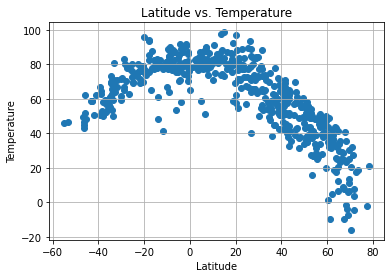

<Figure size 432x288 with 0 Axes>

In [225]:
x_values = city_df["Lat"]
y_values = city_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.grid(True)
plt.show()
plt.savefig("Images/Latitude vs Temperature.png")

## Latitude vs. Humidity Plot

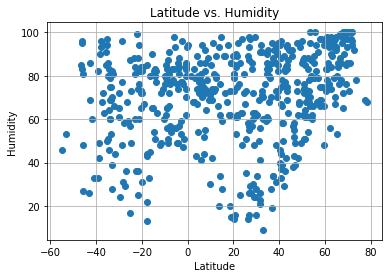

<Figure size 432x288 with 0 Axes>

In [226]:
x_values = city_df["Lat"]
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.grid(True)
plt.show()
plt.savefig("Images/Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

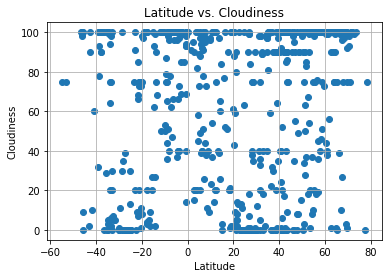

<Figure size 432x288 with 0 Axes>

In [227]:
x_values = city_df["Lat"]
y_values = city_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.grid(True)
plt.show()
plt.savefig("Images/Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

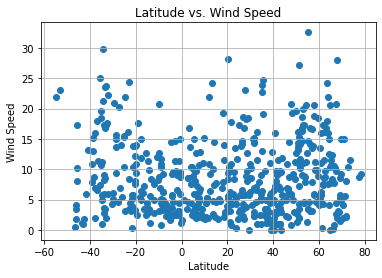

<Figure size 432x288 with 0 Axes>

In [228]:
x_values = city_df["Lat"]
y_values = city_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.grid(True)
plt.show()
plt.savefig("Images/Latitude vs Wind Speed.png")

## Linear Regression

In [229]:
north_hem= city_df.loc[city_df["Lat"]>=0]

south_hem= city_df.loc[city_df["Lat"]<0]

south_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,sampit,-2.5333,112.9500,74.59,96,100,2.39,ID,1634911049
3,vaini,-21.2000,-175.2000,69.96,94,20,10.36,TO,1634911114
5,flinders,-34.5833,150.8552,61.36,83,5,1.01,AU,1634911115
8,mahebourg,-20.4081,57.7000,79.09,73,75,13.80,MU,1634911116
9,hermanus,-34.4187,19.2345,69.80,64,99,29.82,ZA,1634911116


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7549645209308894


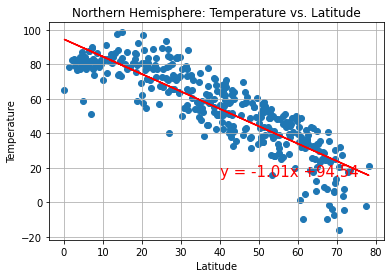

<Figure size 432x288 with 0 Axes>

In [230]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Temperature vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Northern Hemisphere Temperature vs Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5166609837555883


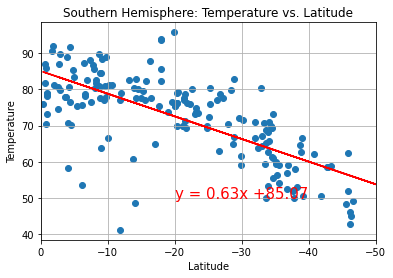

<Figure size 432x288 with 0 Axes>

In [231]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.xlim(0,-50)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Southern Hemisphere Temperature vs Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06546461817080144


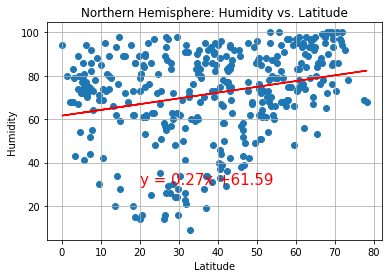

<Figure size 432x288 with 0 Axes>

In [232]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Humidity vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Northern Hemisphere Humidity vs Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.017474812019316253


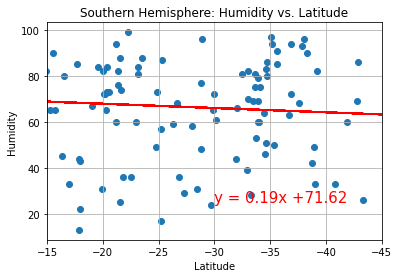

<Figure size 432x288 with 0 Axes>

In [233]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.xlim(-15,-45)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Southern Hemisphere Humidity vs Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04591344552722723


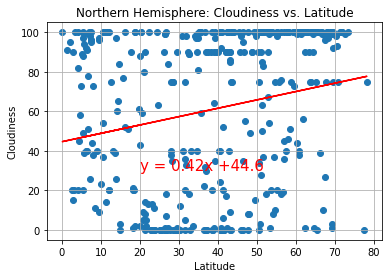

<Figure size 432x288 with 0 Axes>

In [234]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Northern Hemisphere Cloudiness vs Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06045047092245057


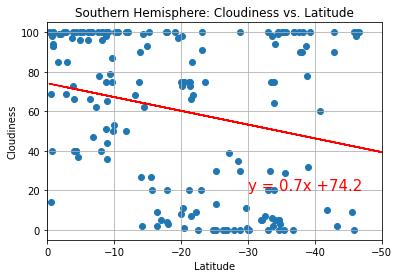

<Figure size 432x288 with 0 Axes>

In [235]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.xlim(0,-50)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Southern Hemisphere Cloudiness vs Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02355063425040989


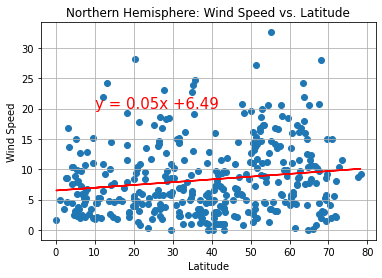

<Figure size 432x288 with 0 Axes>

In [236]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Northern Hemisphere Wind Speed vs Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.092098074639679


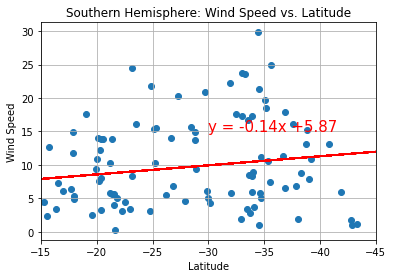

<Figure size 432x288 with 0 Axes>

In [237]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.xlim(-15,-45)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Southern Hemisphere Wind Speed vs Latitude.png")